In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def clean_singlefile_post2010(file, year):
    data = pd.read_csv(file, encoding='latin-1')
    data["GEOFIPS"] = data["STATEFIPS"] * 1000 + data["COUNTYFIPS"]
    data_cleaned = data[["GEOFIPS", "COUNTYNAME", "N1", "N2", "A00100", "A00200", "A00600", "A00300", "A04800", "A10300"]].copy()
    data_cleaned.rename(columns={"COUNTYNAME": "COUNTY", "N1": "NUM_RETURN", "N2": "NUM_EXEMPT",
                            "A00100": "AGI", "A00200": "WAGES_SALARIES",
                            "A00600": "DIVIDENDS", "A00300": "INTEREST", 
                                "A04800": "TAXABLE_INCOME", "A10300": "TAX_LIABILITY"},
                        inplace=True)
    data_cleaned["YEAR"] = np.ones(data_cleaned.shape[0]) * year
    return data_cleaned

In [33]:
data_cleaned_all = clean_singlefile_post2010(f"../data/raw-data/countyincome/2011/11incyallnoagi.csv", 2011)
for year in np.arange(2011, 2020):
    new = clean_singlefile_post2010(f"../data/raw-data/countyincome/{year}/{year % 100}incyallnoagi.csv", year)
    data_cleaned_all = pd.concat((data_cleaned_all, new), axis=0)
data_cleaned_all

,GEOFIPS,COUNTY,NUM_RETURN,NUM_EXEMPT,AGI,WAGES_SALARIES,DIVIDENDS,INTEREST,TAXABLE_INCOME,TAX_LIABILITY,YEAR
0,1000,Alabama,2091218.0,4340121.0,100308257.0,73819452.0,1377991.0,1234472.0,65015332.0,11269687.0,2011.0
1,1001,Autauga County,24315.0,51513.0,1149657.0,903517.0,6940.0,8125.0,732202.0,112969.0,2011.0
2,1003,Baldwin County,87236.0,175844.0,4556224.0,3107119.0,87411.0,67434.0,3102762.0,562341.0,2011.0
3,1005,Barbour County,10648.0,22062.0,355824.0,279766.0,5860.0,6774.0,208827.0,31784.0,2011.0
4,1007,Bibb County,8049.0,17756.0,331373.0,262943.0,1305.0,2796.0,192542.0,28678.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Sweetwater County,20050.0,39870.0,1461220.0,1104920.0,17977.0,8761.0,1104482.0,163037.0,2019.0
3189,56039,Teton County,14870.0,24920.0,4646008.0,1148792.0,862698.0,410116.0,3890926.0,969250.0,2019.0
3190,56041,Uinta County,9370.0,19790.0,588952.0,452641.0,7644.0,3705.0,433697.0,58939.0,2019.0
3191,56043,Washakie County,3740.0,7250.0,239110.0,150977.0,6117.0,3000.0,172761.0,23824.0,2019.0


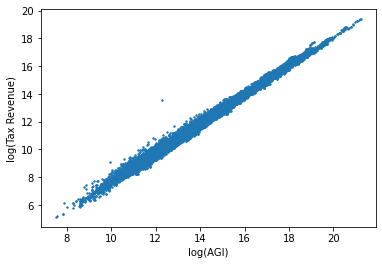

In [38]:
plt.scatter(np.log(data_cleaned_all["AGI"]), np.log(data_cleaned_all["TAX_LIABILITY"]), s=2)
plt.xlabel("log(AGI)")
plt.ylabel("log(Tax Revenue)")
plt.show()

In [23]:
def plot_comparison(year):
    data = clean_singlefile_post2010(f"../data/raw-data/countyincome/{year}/{year % 100}incyallnoagi.csv", year)
    plt.scatter(np.log(data["AGI"]), np.log(data["TAX_LIABILITY"]), label=year)
    plt.xlabel("log(AGI)")
    plt.ylabel("log(Tax Revenue)")
    plt.legend()
    plt.show()

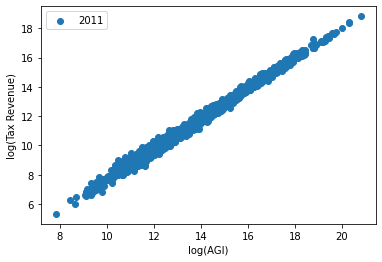

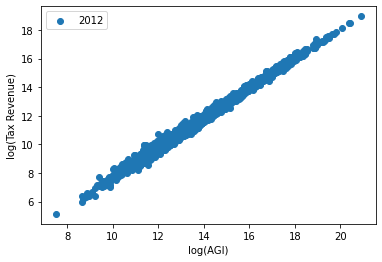

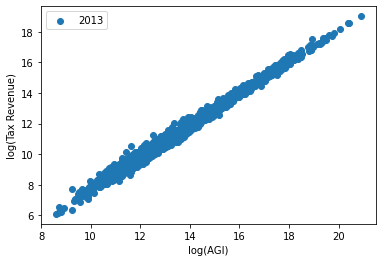

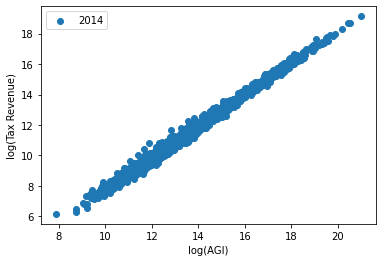

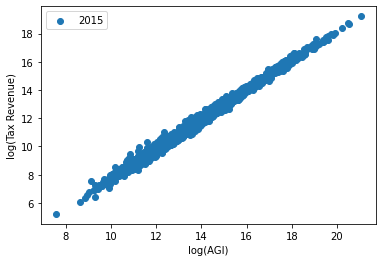

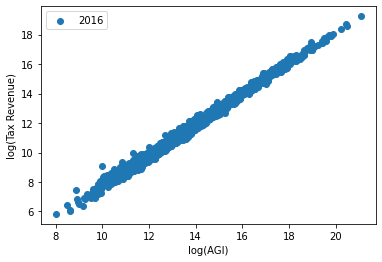

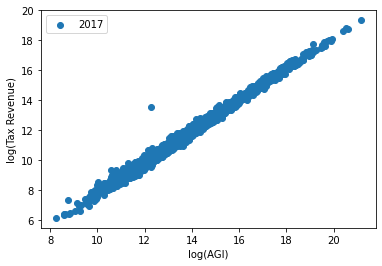

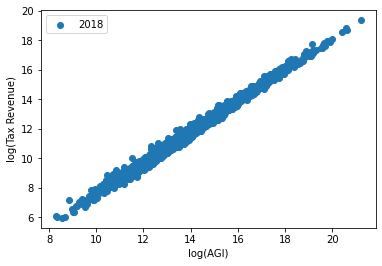

In [30]:
for year in np.arange(2011, 2019):
    plot_comparison(year)